<a href="https://colab.research.google.com/github/ftmhrahimi/Deep_Learning_F20_Assignments/blob/master/Assignment_Set_8/Classification/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt

In [9]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 10
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [11]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

In [12]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [13]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

## **First Model with Adam optimizer**

In [29]:
# Create the model
import keras
model = Sequential()

model.add(keras.Input(shape=input_shape))  
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Flatten())
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 32)        2432      
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                62730     
Total params: 65,162
Trainable params: 65,162
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history_f1 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/20
800/800 [==============================] - 10s 12ms/step - loss: 1.7762 - accuracy: 0.3677 - val_loss: 1.6440 - val_accuracy: 0.4176
Epoch 2/20
800/800 [==============================] - 10s 12ms/step - loss: 1.5556 - accuracy: 0.4519 - val_loss: 1.5772 - val_accuracy: 0.4419
Epoch 3/20
800/800 [==============================] - 10s 12ms/step - loss: 1.5133 - accuracy: 0.4651 - val_loss: 1.5654 - val_accuracy: 0.4513
Epoch 4/20
800/800 [==============================] - 9s 12ms/step - loss: 1.4862 - accuracy: 0.4746 - val_loss: 1.5283 - val_accuracy: 0.4612
Epoch 5/20
800/800 [==============================] - 9s 12ms/step - loss: 1.4585 - accuracy: 0.4874 - val_loss: 1.5131 - val_accuracy: 0.4706
Epoch 6/20
800/800 [==============================] - 9s 12ms/step - loss: 1.4375 - accuracy: 0.4952 - val_loss: 1.4989 - val_accuracy: 0.4740
Epoch 7/20
800/800 [==============================] - 9s 12ms/step - loss: 1.4217 - accuracy: 0.4992 - val_loss: 1.4859 - val_accuracy: 0.4

Test loss: 1.3363049030303955 / Test accuracy: 0.5788000226020813


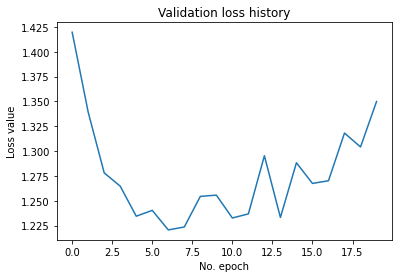

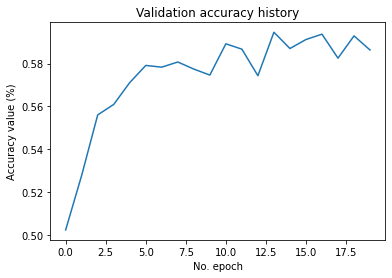

In [ ]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history_f1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **First Model with Dropout and Adam optimizer**


In [17]:
# Create the model
import keras
model = Sequential()

model.add(keras.Input(shape=input_shape))  
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Dropout(0.2))
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Flatten())
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 32)        2432      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 32)          25632     
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 36,074
Trainable params: 36,074
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history_f2 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/20
800/800 [==============================] - 17s 21ms/step - loss: 1.7250 - accuracy: 0.3804 - val_loss: 1.4682 - val_accuracy: 0.4752
Epoch 2/20
800/800 [==============================] - 17s 21ms/step - loss: 1.4338 - accuracy: 0.4889 - val_loss: 1.4370 - val_accuracy: 0.5028
Epoch 3/20
800/800 [==============================] - 17s 22ms/step - loss: 1.3191 - accuracy: 0.5324 - val_loss: 1.3169 - val_accuracy: 0.5404
Epoch 4/20
800/800 [==============================] - 18s 22ms/step - loss: 1.2507 - accuracy: 0.5623 - val_loss: 1.2428 - val_accuracy: 0.5702
Epoch 5/20
800/800 [==============================] - 18s 22ms/step - loss: 1.1912 - accuracy: 0.5824 - val_loss: 1.1992 - val_accuracy: 0.5804
Epoch 6/20
800/800 [==============================] - 18s 22ms/step - loss: 1.1439 - accuracy: 0.5999 - val_loss: 1.1749 - val_accuracy: 0.5883
Epoch 7/20
800/800 [==============================] - 18s 23ms/step - loss: 1.1128 - accuracy: 0.6087 - val_loss: 1.1820 - val_accuracy:

Test loss: 1.0865734815597534 / Test accuracy: 0.6294000148773193


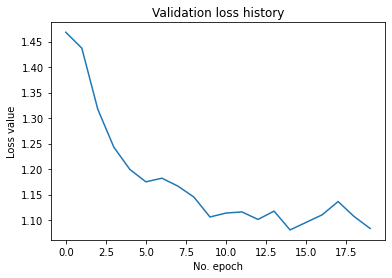

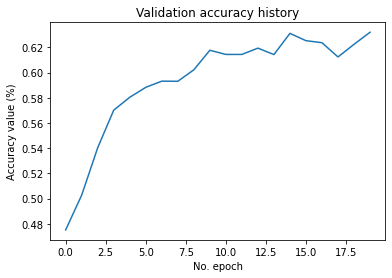

In [19]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history_f2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

### **First Model with SGD Optimizer**

In [24]:
# Compile the model

model.compile(loss=loss_function,
              optimizer=SGD(),
              metrics=['accuracy'])

# Fit data to model
history_f3 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8791 - accuracy: 0.6915 - val_loss: 1.0872 - val_accuracy: 0.6319
Epoch 2/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8592 - accuracy: 0.6978 - val_loss: 1.0784 - val_accuracy: 0.6354
Epoch 3/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8474 - accuracy: 0.7024 - val_loss: 1.0927 - val_accuracy: 0.6312
Epoch 4/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8472 - accuracy: 0.7018 - val_loss: 1.1098 - val_accuracy: 0.6261
Epoch 5/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8439 - accuracy: 0.7047 - val_loss: 1.0846 - val_accuracy: 0.6396
Epoch 6/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8451 - accuracy: 0.7044 - val_loss: 1.0988 - val_accuracy: 0.6316
Epoch 7/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8448 - accuracy: 0.7015 - val_loss: 1.1043 - val_accuracy:

Test loss: 1.0957956314086914 / Test accuracy: 0.6291000247001648


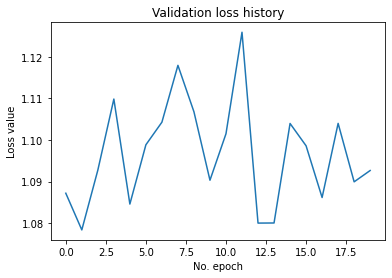

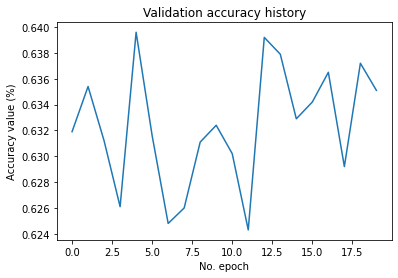

In [25]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history_f3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **First model with RMSprop**

In [26]:
# Compile the model

model.compile(loss=loss_function,
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Fit data to model
history_f4 = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8871 - accuracy: 0.6874 - val_loss: 1.1361 - val_accuracy: 0.6245
Epoch 2/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8818 - accuracy: 0.6931 - val_loss: 1.1175 - val_accuracy: 0.6307
Epoch 3/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8749 - accuracy: 0.6931 - val_loss: 1.0994 - val_accuracy: 0.6267
Epoch 4/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8741 - accuracy: 0.6939 - val_loss: 1.1075 - val_accuracy: 0.6301
Epoch 5/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8656 - accuracy: 0.6981 - val_loss: 1.0834 - val_accuracy: 0.6425
Epoch 6/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8615 - accuracy: 0.6965 - val_loss: 1.1220 - val_accuracy: 0.6244
Epoch 7/20
800/800 [==============================] - 18s 22ms/step - loss: 0.8575 - accuracy: 0.7006 - val_loss: 1.1237 - val_accuracy:

Test loss: 1.0978690385818481 / Test accuracy: 0.6431000232696533


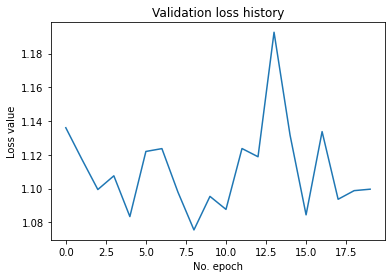

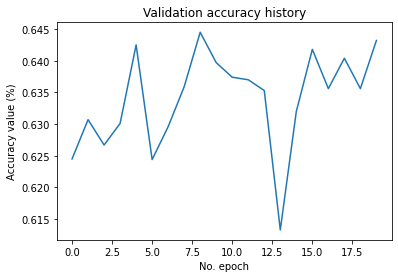

In [27]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history_f4.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history_f4.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Compare Models**

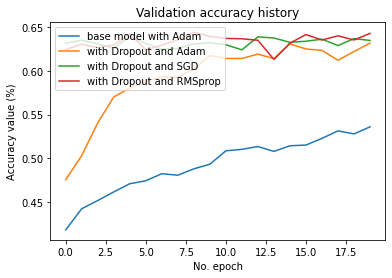

In [31]:
# Plot history: Accuracy
plt.plot(history_f1.history['val_accuracy'])
plt.plot(history_f2.history['val_accuracy'])
plt.plot(history_f3.history['val_accuracy'])
plt.plot(history_f4.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend(['base model with Adam','with Dropout and Adam','with Dropout and SGD','with Dropout and RMSprop'], loc='upper left')
plt.show()

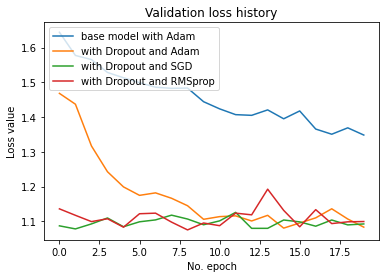

In [32]:
# Plot history: Loss
plt.plot(history_f1.history['val_loss'])
plt.plot(history_f2.history['val_loss'])
plt.plot(history_f3.history['val_loss'])
plt.plot(history_f4.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['base model with Adam','with Dropout and Adam','with Dropout and SGD','with Dropout and RMSprop'], loc='upper left')
plt.show()